<a href="https://colab.research.google.com/github/dioallan/testecolab/blob/main/T1_%E2%80%93_Atividade_de_Aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup


In [ ]:
from urllib.request import urlopen

texto1 = []
from bs4 import BeautifulSoup
html = urlopen("https://pt.wikipedia.org/wiki/Universidade_Presbiteriana_Mackenzie")
res = BeautifulSoup(html.read(),"html5lib");57

text = res.text

texto1.append(text)

for i in range(len(texto1)):
    texto1[i] = texto1[i].lower() # para unicidade
    texto1[i] = texto1[i].replace('\n','')
    texto1[i] = texto1[i].replace('.','')
    texto1[i] = texto1[i].replace(',','')
    texto1[i] = texto1[i].replace('(','')
    texto1[i] = texto1[i].replace(')','')
    texto1[i] = texto1[i].replace('?','')
    texto1[i] = texto1[i].replace('\'','') # elimina ' e "

In [ ]:
mydict = {}                             # crie um dicionário vazio
cont = 0
for line in texto1:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
      cont = cont + 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente
      cont = cont + 1

print (mydict)
print ("Quantidade total de palavras: ", cont)

{'universidade': 45, 'presbiteriana': 28, 'mackenzie': 46, '–': 7, 'wikipédia': 4, 'a': 57, 'enciclopédia': 2, 'livredocumentdocumentelementclassname="client-js': 1, 'vector-feature-language-in-header-enabled': 1, 'vector-feature-language-in-main-page-header-disabled': 1, 'vector-feature-language-alert-in-sidebar-enabled': 1, 'vector-feature-sticky-header-disabled': 1, 'vector-feature-page-tools-disabled': 1, 'vector-feature-page-tools-pinned-disabled': 1, 'vector-feature-main-menu-pinned-disabled': 1, 'vector-feature-limited-width-enabled': 1, 'vector-feature-limited-width-content-enabled";function{var': 1, 'cookie=documentcookiematch/:^|;': 1, 'ptwikimwclientprefs=[^;]+/;ifcookie{var': 1, 'featurename=cookie[1];documentdocumentelementclassname=documentdocumentelementclassnamereplacefeaturename+-enabledfeaturename+-disabled;}};rlconf={"wgbreakframes":false"wgseparatortransformtable":["\\t""': 1, '\\t"]"wgdigittransformtable":[""""]"wgdefaultdateformat":"dmy""wgmonthnames":["""janeiro"

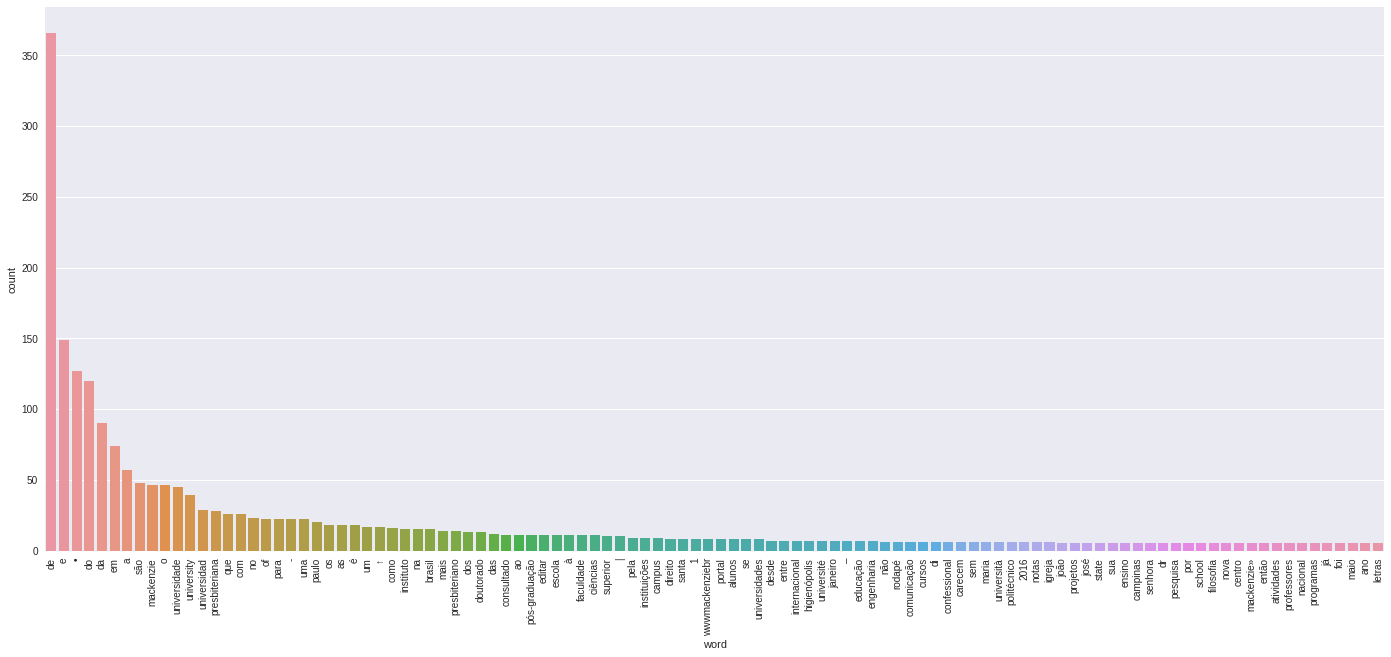

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()